In [ ]:
import torch 
import torch.nn as nn 
import torch.optim as optim 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from utils import _slid_win
from model import CustomCNN, train_model, predict


## **Time series exercice**

#### Generated data sine wave example 

In [2]:
in_sin = torch.linspace(-torch.pi, torch.pi, 2000)
sine_wave = torch.sin(in_sin)
sine_wave.shape

torch.Size([2000])

In [4]:
##time series prepared data
slid_win = 5 
X, y = _slid_win(sine_wave, slid_win, len(sine_wave))

In [5]:
##train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
##model 
model = CustomCNN(slid_win)
##hyperparams 
epochs = 1000
lr = 0.001 
optimizer = optim.Adam(model.parameters(), lr=lr)
criterion = nn.MSELoss()

## train model 

y_hat = train_model(model=model, X=X_train, y=y_train, optimizer=optimizer, epochs=epochs, criterion=criterion)

Epoch [1/1000], Loss: 0.4901
Epoch [2/1000], Loss: 0.4841
Epoch [3/1000], Loss: 0.4783
Epoch [4/1000], Loss: 0.4726
Epoch [5/1000], Loss: 0.4669
Epoch [6/1000], Loss: 0.4613
Epoch [7/1000], Loss: 0.4557
Epoch [8/1000], Loss: 0.4502
Epoch [9/1000], Loss: 0.4446
Epoch [10/1000], Loss: 0.4391
Epoch [11/1000], Loss: 0.4336
Epoch [12/1000], Loss: 0.4280
Epoch [13/1000], Loss: 0.4225
Epoch [14/1000], Loss: 0.4170
Epoch [15/1000], Loss: 0.4114
Epoch [16/1000], Loss: 0.4059
Epoch [17/1000], Loss: 0.4003
Epoch [18/1000], Loss: 0.3947
Epoch [19/1000], Loss: 0.3891
Epoch [20/1000], Loss: 0.3835
Epoch [21/1000], Loss: 0.3778
Epoch [22/1000], Loss: 0.3721
Epoch [23/1000], Loss: 0.3664
Epoch [24/1000], Loss: 0.3607
Epoch [25/1000], Loss: 0.3549
Epoch [26/1000], Loss: 0.3491
Epoch [27/1000], Loss: 0.3433
Epoch [28/1000], Loss: 0.3374
Epoch [29/1000], Loss: 0.3315
Epoch [30/1000], Loss: 0.3256
Epoch [31/1000], Loss: 0.3196
Epoch [32/1000], Loss: 0.3136
Epoch [33/1000], Loss: 0.3075
Epoch [34/1000], Lo

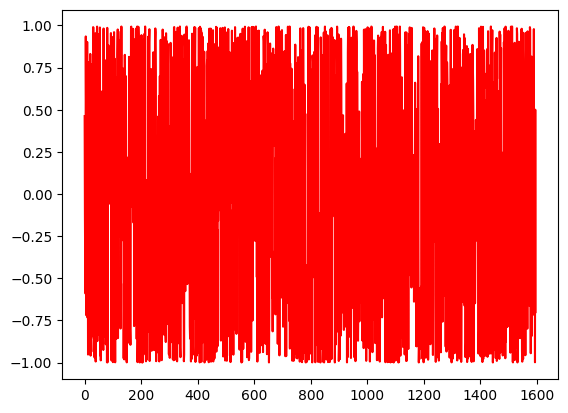

In [11]:
with torch.no_grad():
    plt.plot(y_hat, 'red')

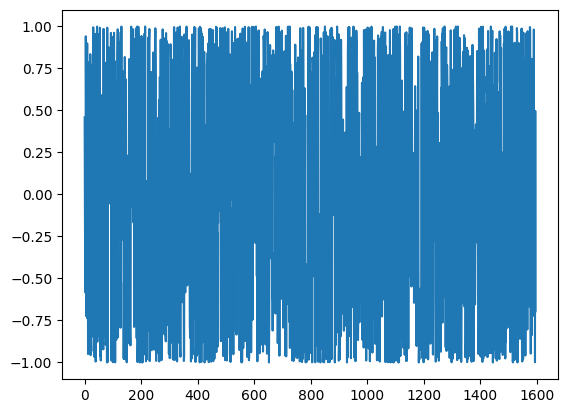

In [13]:
plt.plot(y_train)


In [14]:
y_pred = predict(model_trained=model, X_test=X_test)

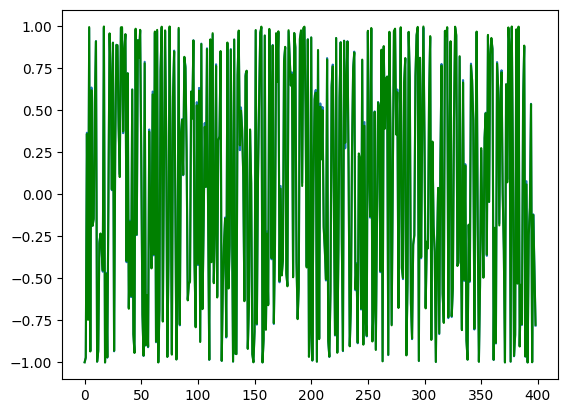

In [16]:
plt.plot(y_pred)
plt.plot(y_test, 'green')

In [17]:
##calculate loss test
criterion(y_pred, y_test)

tensor(6.8728e-05)

### 2024-12 Dataset example

In [20]:
data = pd.read_csv('data/time_series_data_tp.csv')['INDPRO']

In [21]:
series = torch.from_numpy(data.values)

In [22]:
#prepare data 
slid_win = 7
X, y = _slid_win(series, slid_win, len(series))

In [23]:
#train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [24]:
##model 
model = CustomCNN(slid_win)
##hyperparams 
epochs = 1000
lr = 0.001 
optimizer = optim.Adam(model.parameters(), lr=lr)
criterion = nn.MSELoss()

## train model 

y_hat = train_model(model=model, X=X_train, y=y_train, optimizer=optimizer, epochs=epochs, criterion=criterion)

Epoch [1/1000], Loss: 4163.0815
Epoch [2/1000], Loss: 4119.3560
Epoch [3/1000], Loss: 4080.4084
Epoch [4/1000], Loss: 4043.3613
Epoch [5/1000], Loss: 4006.0813
Epoch [6/1000], Loss: 3968.5649
Epoch [7/1000], Loss: 3930.8108
Epoch [8/1000], Loss: 3892.8181
Epoch [9/1000], Loss: 3854.5850
Epoch [10/1000], Loss: 3816.1094
Epoch [11/1000], Loss: 3777.3899
Epoch [12/1000], Loss: 3738.4219
Epoch [13/1000], Loss: 3699.2034
Epoch [14/1000], Loss: 3659.7314
Epoch [15/1000], Loss: 3620.0024
Epoch [16/1000], Loss: 3580.0122
Epoch [17/1000], Loss: 3539.7573
Epoch [18/1000], Loss: 3499.2336
Epoch [19/1000], Loss: 3458.4377
Epoch [20/1000], Loss: 3417.3650
Epoch [21/1000], Loss: 3376.0112
Epoch [22/1000], Loss: 3334.3728
Epoch [23/1000], Loss: 3292.4456
Epoch [24/1000], Loss: 3250.2246
Epoch [25/1000], Loss: 3207.7063
Epoch [26/1000], Loss: 3164.8867
Epoch [27/1000], Loss: 3121.7622
Epoch [28/1000], Loss: 3078.3281
Epoch [29/1000], Loss: 3034.5820
Epoch [30/1000], Loss: 2990.5203
Epoch [31/1000], Lo

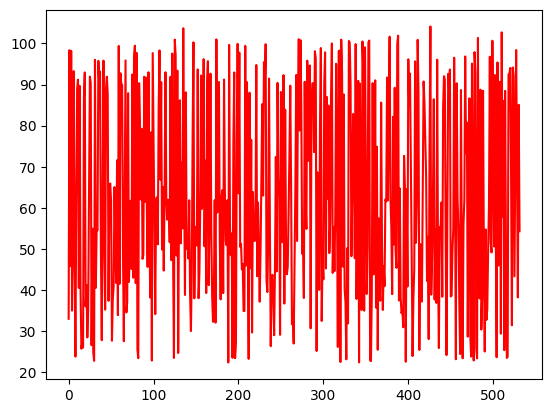

In [25]:
with torch.no_grad():
    plt.plot(y_hat, 'red')

In [26]:
y_pred = predict(model_trained=model, X_test=X_test)

In [27]:
##calculate loss test
criterion(y_pred, y_test)

tensor(1.1617)

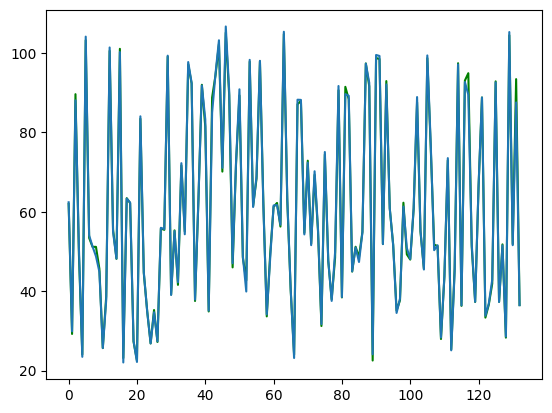

In [28]:
plt.plot(y_pred, 'green')
plt.plot(y_test)